## 19-1. Regression.

**1. About Regresson**

- The analysis method which is traditionally used in statistics is an analysis method which model the relationship between each continuous variable based on the observed various data and measures the suitability for it.

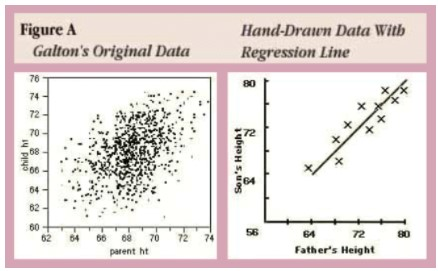

<http://www.biostat.jhsph.edu/courses/bio653/misc/JMPer%20Cable%20Summer%2098%20Why%20is%20it%20called%20Regression.htm>

- Regression means statistical methods for pursuing functional relations between two or more variables.

- The assumption and analysis of the relationship between the two variables in a straight line form is called linear regression.

> The basic assumption oflinear regression analysis?
>> 1)Linearity 2)Independence 3)Homoskedasticity 4)Normality

**2. Two type of supervised learning: Classification and Regression**

- Classification: Inferring the class y of the data using various feature values of the data X.
- Regression: Deduces the exact value of other associated data y using the various feature values of data X.

## 19-2. Linear Regression

: Regression Analysis Method for Modeling Linear Correlation between Dependent variable y and one or more independent variable X.
<br>
<br>
In addition, the method of having one independent variable according to the number of independent variables is simple linear regression, and multiple linear regression if there are more than one independent variable.

**1. Linear Regression Modeling**

$$ y = \beta_x + \epsilon$$

- beta is called the regression coefficient.
- epsilon means error between dependent and independent variables.
- That is, thes two are parameters that must be estimated from the data.

: In the end, finding a linear regression model means finding regression coefficients and errors so that our linear equations fit well with the given data.

**2. Linear Regression Model Notation in Machine Learning**

$$ H = W_x + b $$

- H is Hypothesis, W is Weight, b is bias.

: The regression coefficient beta value in the regression model is W, and the error value is b. For reference, in most cases, W and b are not simple scalar values but hace a gigh-dimensional matrix form. The larger the number of parameters, the larger the model size and the harder it is to learn.

**3. Terminology**

: Residuals means the difference etween the estimated value and the actual data using the regression model.

$$ argmin_W,_b (\sum_{i=1}^n residuals^2) $$

**ex)** if having data (2, 8) and assume that the formula of linear regression model is y = 2x + 3,
<br>

redisuals value is 8(real data y value) - 7(predicted y value) = 1

- A method of obtaining W, b which minimizes the sum of squares of residuals for n point data.

- When checking whether the regression model is well determined, it is a reference indicator called a determinant coefficient (noted as R-squared, or R2 score). This is shown as a value between 0 and 1, and the closer to 1, the more the regression model expresses the data well.

**4. Dataset preperation(Boston house prices dataset)**

In [4]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# load data
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data,
                                                                   price,
                                                                   test_size=0.2)
df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("dimention of boston dataset: ", data.shape)
print("dimention of price: ", price.shape)
print("dimention of boston train dataset: ", x_train.shape)
print("dimention of boston test dataset: ", x_test.shape)

print("example of Boston dataset")
df.head() # data summary

dimention of boston dataset:  (506, 13)
dimention of price:  (506,)
dimention of boston train dataset:  (404, 13)
dimention of boston test dataset:  (102, 13)
example of Boston dataset


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37
1,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10
2,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24
3,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
4,0.55007,20.0,3.97,0.0,0.647,7.206,91.6,1.9301,5.0,264.0,13.0,387.89,8.10


- Boston dataset consists of 13 type attribute and 506 rows.
- The value of the pricecorresponding to each row is stored in a price.

In [5]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**5. Apply Linear Regression to Boston Dataset**

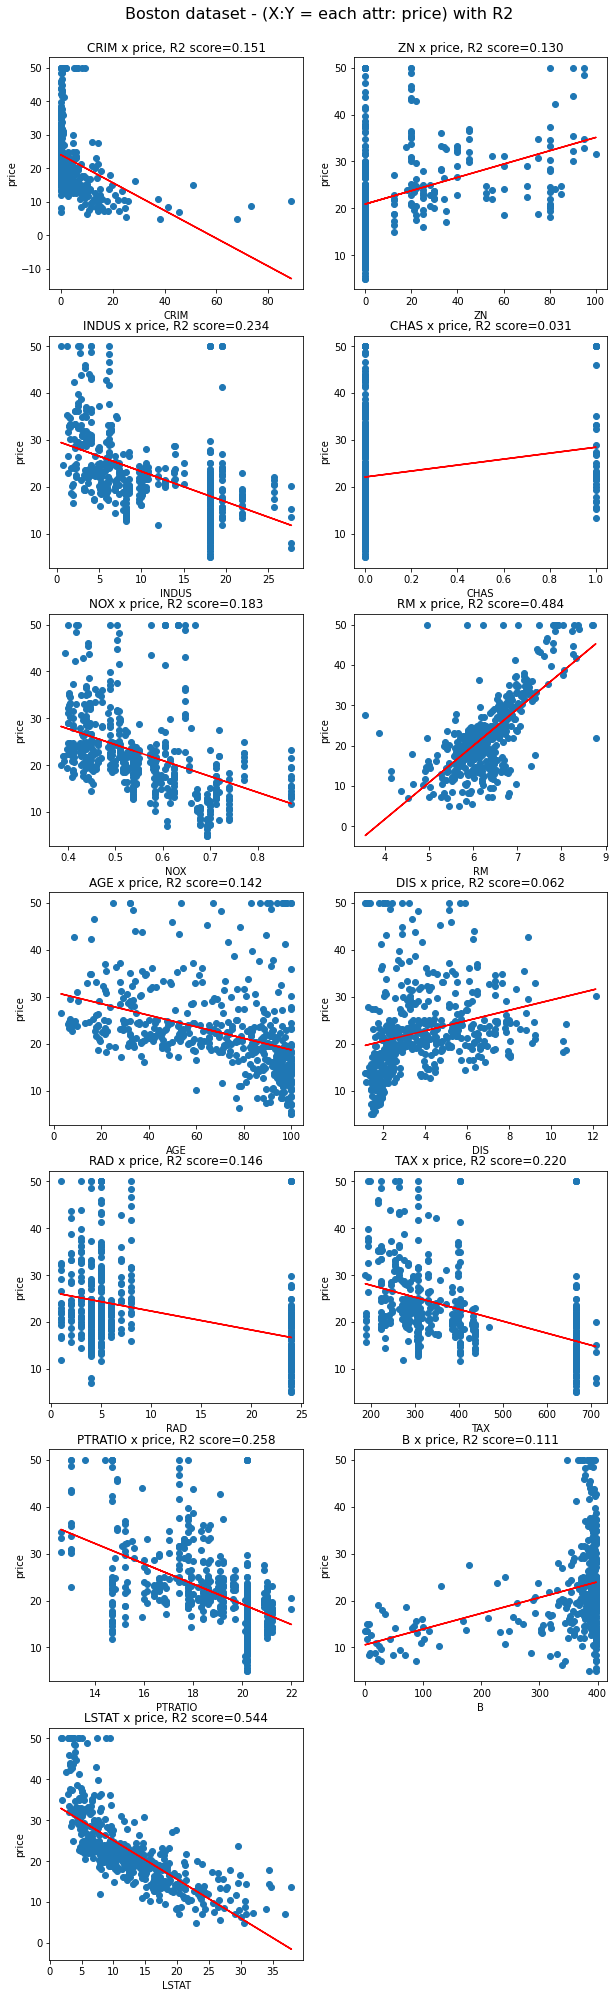

In [6]:
# Boston dataset의 각 attribute에 선형회귀 적용하는 예제
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.

    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름
    estimator = LinearRegression() # 선형 회귀 모델이에요.

    #x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하는 과정이에요
    estimator.fit(single_attr, price) 

    #위 fit() 과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때의 예측 Y 값이에요. 
    pred_price = estimator.predict(single_attr)

    score = metrics.r2_score(price, pred_price) # 결정계수를 구하는 함수에요. 

    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

- The linear regression model drawn using LSTAT(R2=0.544) and RM(R2=0.484) which are high in R2 score can be seen to explain the data well.
- See that both data are well gathered along the regression line overall.

**6. Gradient Descent Algorithm)**

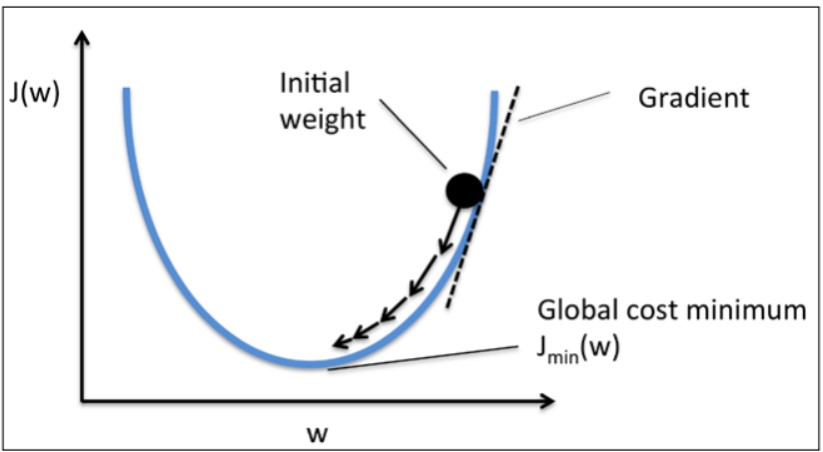

<https://lsh424.tistory.com/9> 

- In machine learning, the assumption that the point where the gradient (differential value) of the loss function is minimal is the point where the loss function is minimal.

$$ W := W - \alpha\frac{\partial}{\partial W}J(W) $$

- alpha is learning rate.
- the larger the value, the longer the arrows in the picture, allowing for faster convergence.
- However, if the learning rate is too large, there are cases where the optimal W value is skipped and the convegence is not possible, so selecting the appropriate learning rate is very important in machine learning and deep learning.

## 19-3. Logistic Regression

- Logistic regression is a map learning algorithm that predicts the probability that data belongs to a category as a value between 0 and 1, and classifies it as a category with higher probability according to the probaility.
- Used frequently for binary classification problems.

**1. Theory and Terminology**

- ex) If the dependent variable is 0 P(y = O|x),

$$ LogOdds = log(\frac{P(y = O|x)}{1-P(y = O|x)})= \beta_0 + \sum_{i=1}^p B_ix_i $$

- ex) The concept of Odds is divided by the probability that an event does not occur.

$$ Odds(Malignant) = \frac{P(Y = O|x}{P(Y = 1|x)} = \frac{P(Y = O|x)}{1 - P(Y = O|x)} = \frac{0.2}{0.8} = 0.25 $$

- ex) The value taken log on the Odds value is called lod-odds.

$$ log(\frac{P(y = O|x)}{1-P(y = O|x)})= log(0.25) =  \beta_0 + \sum_{i=1}^p B_ix_i $$

- **Theory**
    - The dependent variable is the probaility is desired of zeor or one and the value of the log-odds itself is not necessary. So, in order to obtain the probability of belonging to a specific category from log-odds, the expression of log-odds is re-arranged about P(Y=0|x)P(Y=0∣x),

$$ P(y = O|x) = \frac{exp(\beta_0 + \sum_{i=1}^p B_ix_i)}{1 + exp(\beta_0 + \sum_{i=1}^p B_ix_i)} $$

- **assumption**

$$ z = \beta_0 + \sum_{i=1}^p B_ix_i $$

$$ P(y = O|x) = \frac{1}{1 + exp(-z)} $$

**2. Data overview**

In [7]:
# 로지스틱 회귀분석 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = O(Malignant - 악성 종양), y = 1(Benign - 양성 종양)
cancer_X, cancer_y = cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X,
                                                   cancer_y,
                                                   test_size=0.1,
                                                   random_state=10)
print("전체 검사자 수:{}".format(len(cancer_X)))
print("attribute 수:{}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수:{}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수:{}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수:569
attribute 수:30
Train dataset에 사용되는 검사자 수:512
Test dataset에 사용되는 검사자 수:57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**3. Example of logistic regression analysis**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() # 로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용한 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력

# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



C:\Users\minjw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


: LogisticRegression() module allows us to learn logistic regression model which can perform classification of breast cancer test data with fairly high Precision and Recall by omitting many intermediate steps such as log-odds calculation through a few lines of code.

## 19-4 Softmax function and Cross Entropy.

**1. Softmax function**

- The Softmax function is a function that categorizes into several categories, not two;
- that is, it is a function suitable for multi-class classification.

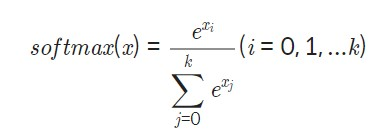

**2. Cross Entropy**

- The Cross entropy function is used as a loss function of the softmax function.

$$ H(p,q) = -\sum_x p(x)logq(x) $$

- Because it is a loss function, weight learning is done in the direction that the value of H(p,q) decreases as the weight is optimized. And p(x) is the category value of the actual data, and q(x) is the result value of the softmax.

**4. Examples of softmax and cross entropy using breast cancer dataset**

- Implementation using Tensorflow API

In [9]:
import tensorflow as tf
from tensorflow import keras

n_dense = 30
n_train_epoch = 20
num_classes = 2 # 악성, 양성 2가지 클래스

model = keras.models.Sequential()
model.add(keras.layers.Dense(num_classes, use_bias=True,
                            activation='softmax',
                            input_shape=(30,)))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 테스트
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss:{}".format(test_loss))
print("test_accuracy:{}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 62        
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 0s 778us/step - loss: 290.1144 - accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 1ms/step - loss: 256.5887 - accuracy: 0.6270
Epoch 3/20
16/16 [==============================] - 0s 864us/step - loss: 223.3778 - accuracy: 0.6270
Epoch 4/20
16/16 [==============================] - 0s 1ms/step - loss: 189.7464 - accuracy: 0.6270
Epoch 5/20
16/16 [==============================] - 0s 1ms/step - loss: 156.4637 - accuracy: 0.6270
Epoch 6/20
16/16 [==============================] - 0s 903us/step - loss: 123.6078 -

- **Use the above code as a deep learning model**

In [10]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes=2

model=keras.models.Sequential()

# layer 3장 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense, use_bias=True))
model.add(keras.layers.Dense(n_dense, use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss:{}".format(test_loss))
print("test_accuracy:{}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 2)                 62        
                                                                 
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 1s 3ms/step - loss: 121.6498 - accuracy: 0.5059
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 27.6039 - ac